In [ ]:
pip install basemap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from PIL import Image

In [ ]:
# 1. Data Loading
def load_data(file_path):
    """Load the dataset."""
    data = pd.read_csv(file_path)
    return data

In [ ]:
# 2. Data Integrity
def check_data_integrity(data):
    """Ensure the accuracy, consistency, and reliability of data."""
    # Checking for unique IDs
    if data['id'].is_unique:
        print("IDs are unique.")
    else:
        print("There are duplicate IDs.")
    print(data.info())
    print(data.describe(include='all'))

In [ ]:
# 3. Missing Data Handling
def handle_missing_data(data):
    print(data.isnull().sum())
    data['reviews_per_month'].fillna(0, inplace=True)
    data['last_review'].fillna('No Review', inplace=True)
    return data

In [ ]:
# 4. Duplicate Removal
def remove_duplicates(data):
    """Remove duplicate records."""
    before = data.shape[0]
    data = data.drop_duplicates()
    after = data.shape[0]
    print(f"Removed {before - after} duplicate records.")
    return data

In [ ]:
# 5. Standardization
def standardize_data(data):
    """Standardize formatting and units."""
    data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

    data['name'] = data['name'].str.lower()
    data['host_name'] = data['host_name'].str.lower()
    data['neighbourhood_group'] = data['neighbourhood_group'].str.lower()
    data['neighbourhood'] = data['neighbourhood'].str.lower()
    data['room_type'] = data['room_type'].str.lower()

    return data

In [ ]:
# 6. Outlier Detection
def detect_outliers(data):
    Q1 = data['price'].quantile(0.25)
    Q3 = data['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
    print(f"Detected {outliers.shape[0]} outliers in the price column.")

    data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

    return data

In [ ]:
# 7. Map Visualization
def plot_map(data, image_path):
    """Plot data on the map of New York City."""
    # Load the provided image
    img = Image.open(image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(img, extent=[-74.2591, -73.7004, 40.4774, 40.9176], aspect='auto')

    # Plotting the data points
    plt.scatter(data['longitude'], data['latitude'], marker='o', color='red', alpha=0.5, s=10)
    plt.title('Airbnb Listings in New York City')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

IDs are unique.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36334 entries, 0 to 36333
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36334 non-null  int64  
 1   name                            36318 non-null  object 
 2   host_id                         36334 non-null  int64  
 3   host_name                       36313 non-null  object 
 4   neighbourhood_group             36333 non-null  object 
 5   neighbourhood                   36333 non-null  object 
 6   latitude                        36333 non-null  float64
 7   longitude                       36333 non-null  float64
 8   room_type                       36333 non-null  object 
 9   price                           36333 non-null  float64
 10  minimum_nights                  36333 non-null  float64
 11  number_of_reviews               36333 non-null  float64
 12  last_review     

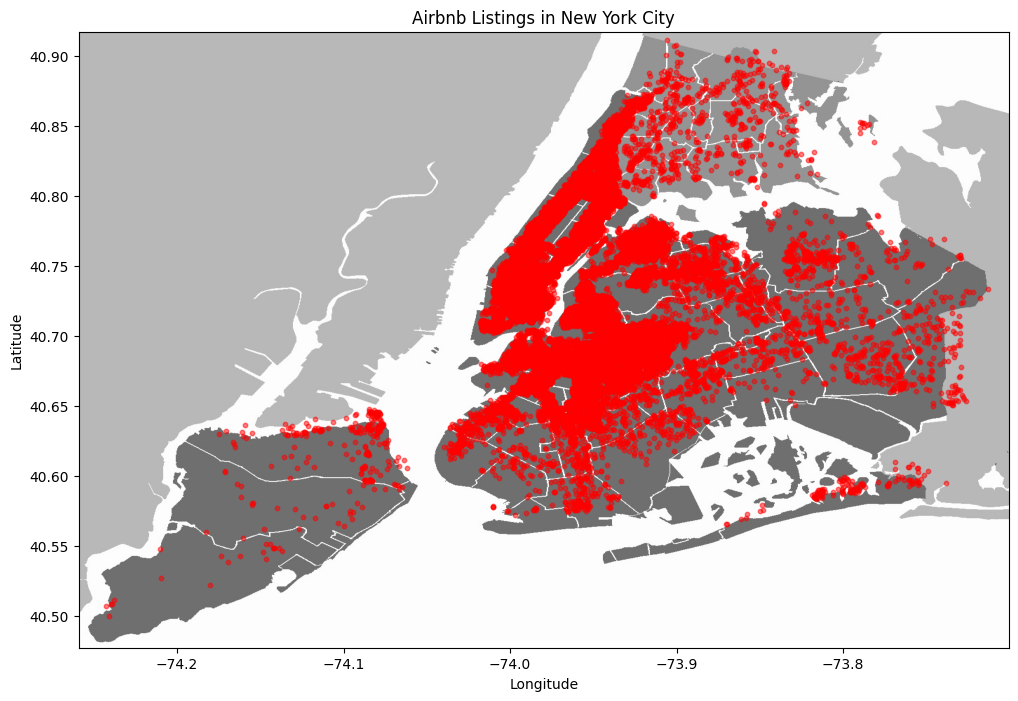

Cleaned data saved to cleaned_data_file.csv


In [ ]:
# Main function
def main():
    file_path = '/content/AB_NYC_2019.csv'
    image_path = '/content/New_York_City_.png'

    data = load_data(file_path)

    # Data Integrity
    check_data_integrity(data)

    # Missing Data Handling
    data = handle_missing_data(data)

    # Duplicate Removal
    data = remove_duplicates(data)

    # Standardization
    data = standardize_data(data)

    # Outlier Detection
    data = detect_outliers(data)

    # Display cleaned data
    print("Cleaned Data (Data Display):")
    print(data.head(30))

    # Map Visualization
    plot_map(data, image_path)

    # Save the cleaned data
    cleaned_file_path = 'cleaned_data_file.csv'
    data.to_csv(cleaned_file_path, index=False)
    print(f"Cleaned data saved to {cleaned_file_path}")

if __name__ == "__main__":
    main()